Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [ ]:
import math

# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [25]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
matrica_dizajna = poly.fit_transform(X)
print(matrica_dizajna)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [27]:
import numpy
from numpy import linalg

matrica_dizajna_transponirano = numpy.matrix.transpose(matrica_dizajna)

w = matrica_dizajna_transponirano @ matrica_dizajna
w = linalg.inv(w)
w = w @ matrica_dizajna_transponirano @ y

print(w.flatten())
# Racunanje pseudoinverza
pseudo_inverz = linalg.pinv(matrica_dizajna)
w_sa_pseudo_inverzom = pseudo_inverz @ y

print(w_sa_pseudo_inverzom.flatten())
print(np.isclose(w, w_sa_pseudo_inverzom).flatten())

[2.2        0.45714286]
[2.2        0.45714286]
[ True  True]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [28]:
from sklearn.metrics import mean_squared_error

# Vaš kôd ovdjefrom sklearn.metrics import mean_squared_error
w_transponirano = numpy.matrix.transpose(w)
y_transponirano = numpy.matrix.transpose(y)
pogreska_ucenja = 1 / 2 * (
            w_transponirano @ matrica_dizajna_transponirano @ matrica_dizajna @ w - 2 * y_transponirano @ matrica_dizajna @ w + y_transponirano @ y
)
print(f"Pogreska ucenja izracunata pomoću formule: {pogreska_ucenja}")

y_pred = [w_transponirano @ x for x in matrica_dizajna]

pogreska_ucenja_mean_squared = mean_squared_error(y_true=y, y_pred=y_pred)

print(f"Pogreska ucenja izracunata pomocu funkcije mean_squared_error: {pogreska_ucenja_mean_squared}")


Pogreska ucenja izracunata pomoću formule: 4.085714285714285
Pogreska ucenja izracunata pomocu funkcije mean_squared_error: 2.0428571428571427


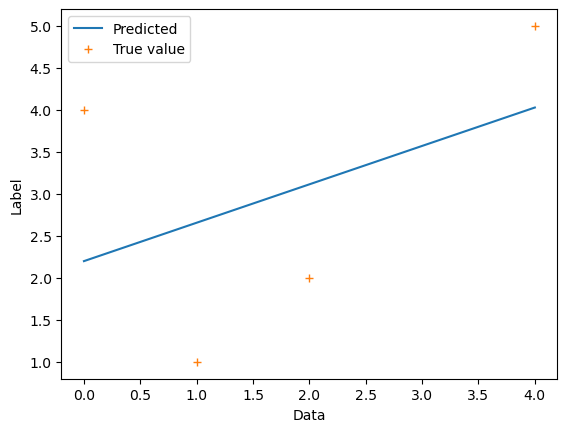

In [29]:
import matplotlib.pyplot as plt

plt.plot(X, y_pred, label="Predicted")
plt.plot(X, y, "+", label="True value")
plt.xlabel("Data")
plt.ylabel("Label")
plt.legend(loc="best")
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [30]:
print(matrica_dizajna)
linalg.inv(matrica_dizajna)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(f"Moje izracunate tezine: {w}\nIzracunate tezine od w1-wn pomocu sklearn: {model.coef_}")
print(f"Izracunati w0 pomocu sklearn: {model.intercept_}")

y_pred_by_model = model.predict(X)
mse = mean_squared_error(y_true=y, y_pred=y_pred_by_model)

print(f"Sklearn predicted mean: {mse}\nMy predicted mean: {pogreska_ucenja_mean_squared}\nRazlika je: {abs(mse - pogreska_ucenja_mean_squared)}")

Moje izracunate tezine: [2.2        0.45714286]
Izracunate tezine od w1-wn pomocu sklearn: [0.45714286]
Izracunati w0 pomocu sklearn: 2.2
Sklearn predicted mean: 2.042857142857143
My predicted mean: 2.0428571428571427
Razlika je: 4.440892098500626e-16


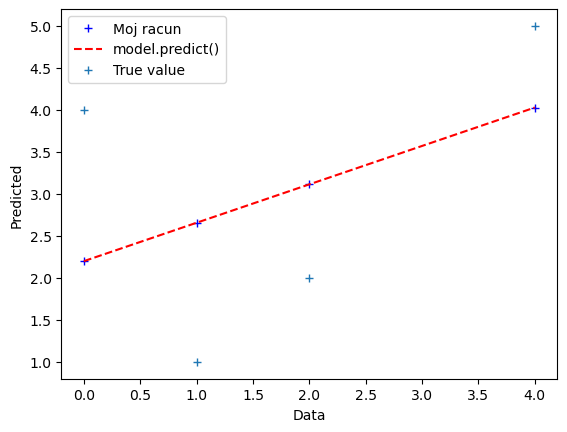

In [32]:
import matplotlib.pyplot as plt

plt.plot(X, y_pred, 'b+', label="Moj racun")
plt.xlabel("Data")
plt.ylabel("Predicted")

plt.plot(X, y_pred_by_model, 'r--', label="model.predict()")
plt.xlabel("Data")
plt.ylabel("Predicted")

plt.plot(X, y, "+", label="True value")

plt.legend(loc = "best")
plt.show()

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [33]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    return [f(x) + normal(scale=noise) for x in X]

In [34]:
def make_instances(x1, x2, N):
    return np.array([np.array([x]) for x in np.linspace(x1, x2, N)])

In [35]:
N = 50
f = lambda x: 5 + x - 2 * pow(x, 2) - 5 * pow(x, 3)
noise = 200

#primjeri = np.random.uniform(low=-5,high=5,size=N)
primjeri2 = make_instances(-5, 5, N)
y = make_labels(primjeri2, f, noise)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

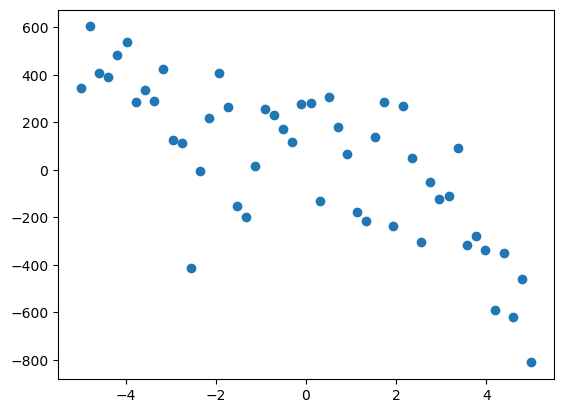

In [36]:
# Vaš kôd ovdje
import matplotlib.pyplot as plt
plt.scatter(primjeri2, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreška učenja: 32615.058828656467


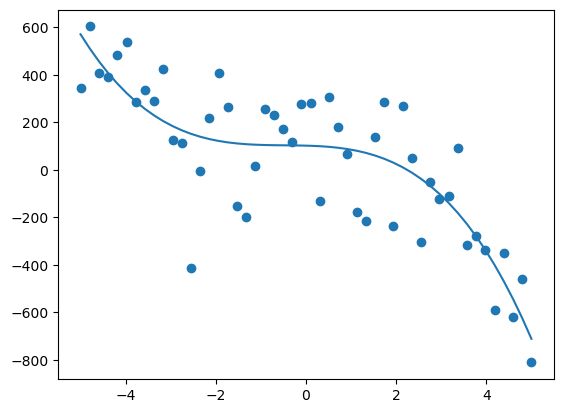

In [37]:
poly = PolynomialFeatures(degree=3)
matrica_dizajna = poly.fit_transform(primjeri2)

pseudo_inverz = linalg.pinv(matrica_dizajna)

w = pseudo_inverz @ y

w_transponirano = numpy.matrix.transpose(w)

y_pred = [w_transponirano @ x for x in matrica_dizajna]

plt.plot(primjeri2, y_pred, "-")
plt.scatter(primjeri2, y)

pogreska_ucenja = mean_squared_error(y_true=y, y_pred=y_pred)
print(f"Pogreška učenja: {pogreska_ucenja}")

### 3. Odabir modela

In [38]:
def getPredictions(degree, X, y):
    poly = PolynomialFeatures(degree=degree)
    matrica_dizajna = poly.fit_transform(X)

    pseudo_inverz = linalg.pinv(matrica_dizajna)
    w = pseudo_inverz @ y
    w_transponirano = numpy.matrix.transpose(w)
    
    return w_transponirano, [w_transponirano @ x for x in matrica_dizajna]

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

In [39]:
def train_and_graph(X, y, d):
    pogreske_ucenja = []
    for degree in d:
        w_transponirano, y_pred = getPredictions(degree, X, y)
        plt.plot(X, y_pred)
        pogreske_ucenja.append(mean_squared_error(y_true=y, y_pred=y_pred))

    plt.legend([f"d = {x}" for x in d], loc="best")
    plt.scatter(X, y, s=50, marker='o', c="#bcbd22")
    for i in range(len(d)):
        print(f"Pogreska ucenja za d={d[i]} iznosi: {pogreske_ucenja[i]}.\n")

Pogreska ucenja za d=1 iznosi: 39442.55238859248.

Pogreska ucenja za d=3 iznosi: 25806.778204664137.

Pogreska ucenja za d=5 iznosi: 24562.065145578323.

Pogreska ucenja za d=10 iznosi: 21303.832262564407.

Pogreska ucenja za d=20 iznosi: 16852.056024061494.

Pogreska ucenja za d=50 iznosi: 23137.955844220865.

Pogreska ucenja za d=100 iznosi: 36595.57263667494.

Pogreska ucenja za d=120 iznosi: 37250.00072089605.


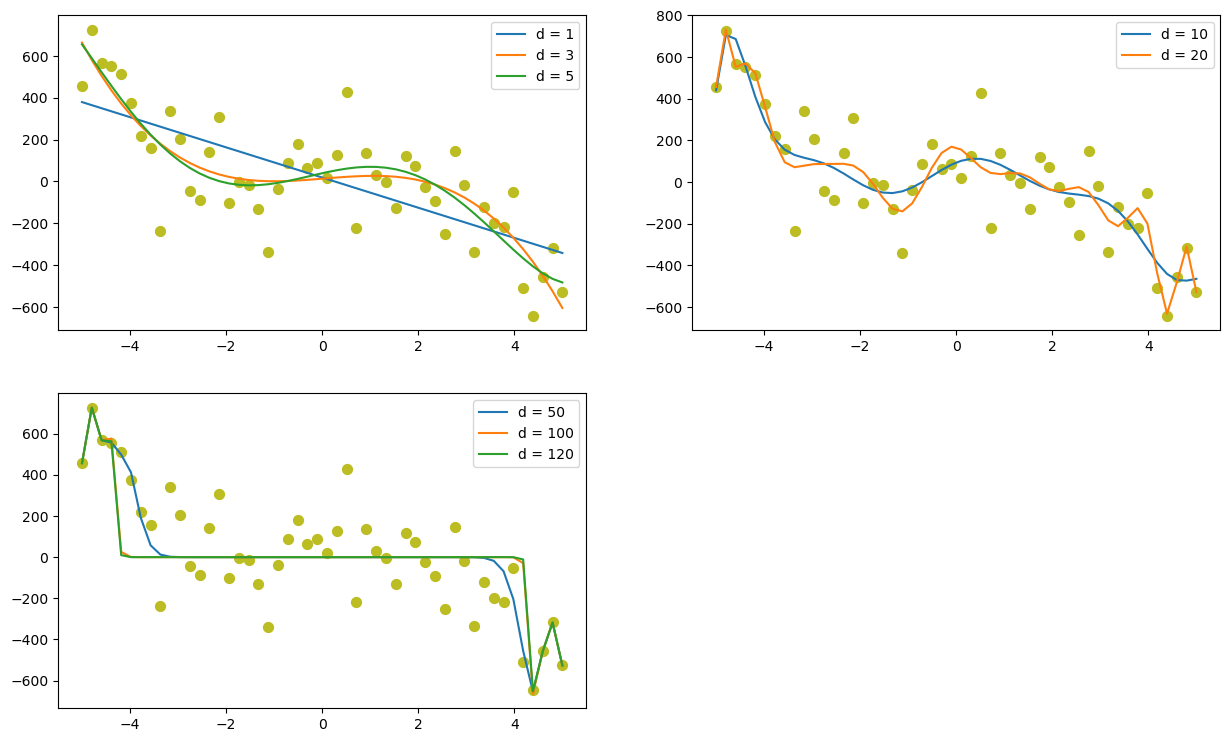

In [40]:
plt.figure(figsize=(15,9))
N = 50
X = make_instances(-5, 5, N)
y = make_labels(X, f, 200)

d = [1,3,5]
plt.subplot(2,2,1)
train_and_graph(X,y,d)

d = [10,20]
plt.subplot(2,2,2)
train_and_graph(X,y,d)

d = [50, 100, 120]
plt.subplot(2,2,3)
train_and_graph(X,y,d)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [41]:
def prediction(w_transponirano, X, degree):
    poly = PolynomialFeatures(degree)
    matrica_dizajna = poly.fit_transform(X)
    return [w_transponirano @ x for x in matrica_dizajna]

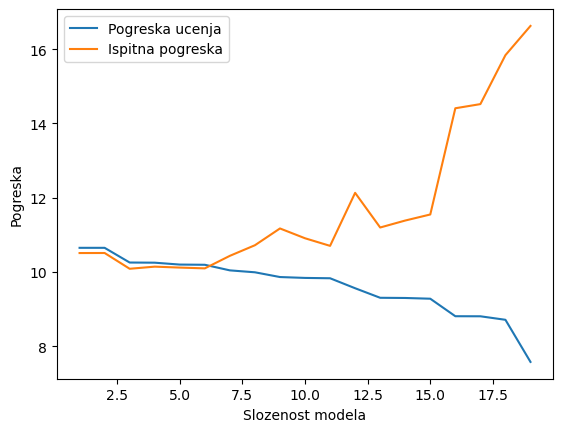

In [42]:
from sklearn.model_selection import train_test_split
from math import log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

pogreske_ucenja = []
ispitne_pogreske = []
range_ = range(1,20)

for degree in range_:
    w_transponirano, y_pred_train = getPredictions(degree, X_train, y_train)
    y_pred_test = prediction(w_transponirano, X_test, degree)
    pogreske_ucenja.append(log(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
    ispitne_pogreske.append(log(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))

plt.plot(range_, pogreske_ucenja)
plt.plot(range_, ispitne_pogreske)
plt.xlabel("Slozenost modela")
plt.ylabel("Pogreska")
plt.legend(["Pogreska ucenja", "Ispitna pogreska"], loc="best")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [43]:
from math import ceil, log
def izracunaj_i_graf_tocnosti(N,sumovi):
    X = make_instances(-5, 5, N)
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    plt.tight_layout(pad = 5)
    X_train, X_test = train_test_split(X, test_size=0.5, train_size=0.5)
    for i, sum in enumerate(sumovi):
        y = make_labels(X, f, sum)
        y_train, y_test = train_test_split(y, test_size=0.5, train_size=0.5)
    
        for j, value in enumerate([1 / 3, 2 / 3, 1]):
            size = ceil(len(X_train) * value)
    
            pogreske_ucenja = []
            ispitne_pogreske = []
            
            indeksi = np.random.choice(len(X_train), size=size, replace=False)
           
            X_train_new = X_train[indeksi]
            X_test_new = X_test[indeksi]
            y_train_new = np.array(y_train)[indeksi]
            y_test_new = np.array(y_test)[indeksi]
    
            range_ = range(1,20)
            for degree in range_:
                w_transponirano, y_pred_train = getPredictions(degree, X_train_new, y_train_new)
                y_pred_test = prediction(w_transponirano, X_test_new, degree)
                pogreske_ucenja.append(log(mean_squared_error(y_true=y_train_new, y_pred=y_pred_train)))
                ispitne_pogreske.append(log(mean_squared_error(y_true=y_test_new, y_pred=y_pred_test)))
    
            axs[i, j].plot(range_, pogreske_ucenja, label='Pogreska ucenja')
            axs[i, j].plot(range_, ispitne_pogreske, label='Ispitna pogreska')
    
            axs[i, j].set_xlabel("Slozenost modela")
            axs[i, j].set_ylabel("Pogreska")
            axs[i, j].legend(["Pogreska ucenja", "Ispitna pogreska"], loc="best")
            axs[i, j].set_title(f"Sum = {sum}, N = {size}")

plt.show()

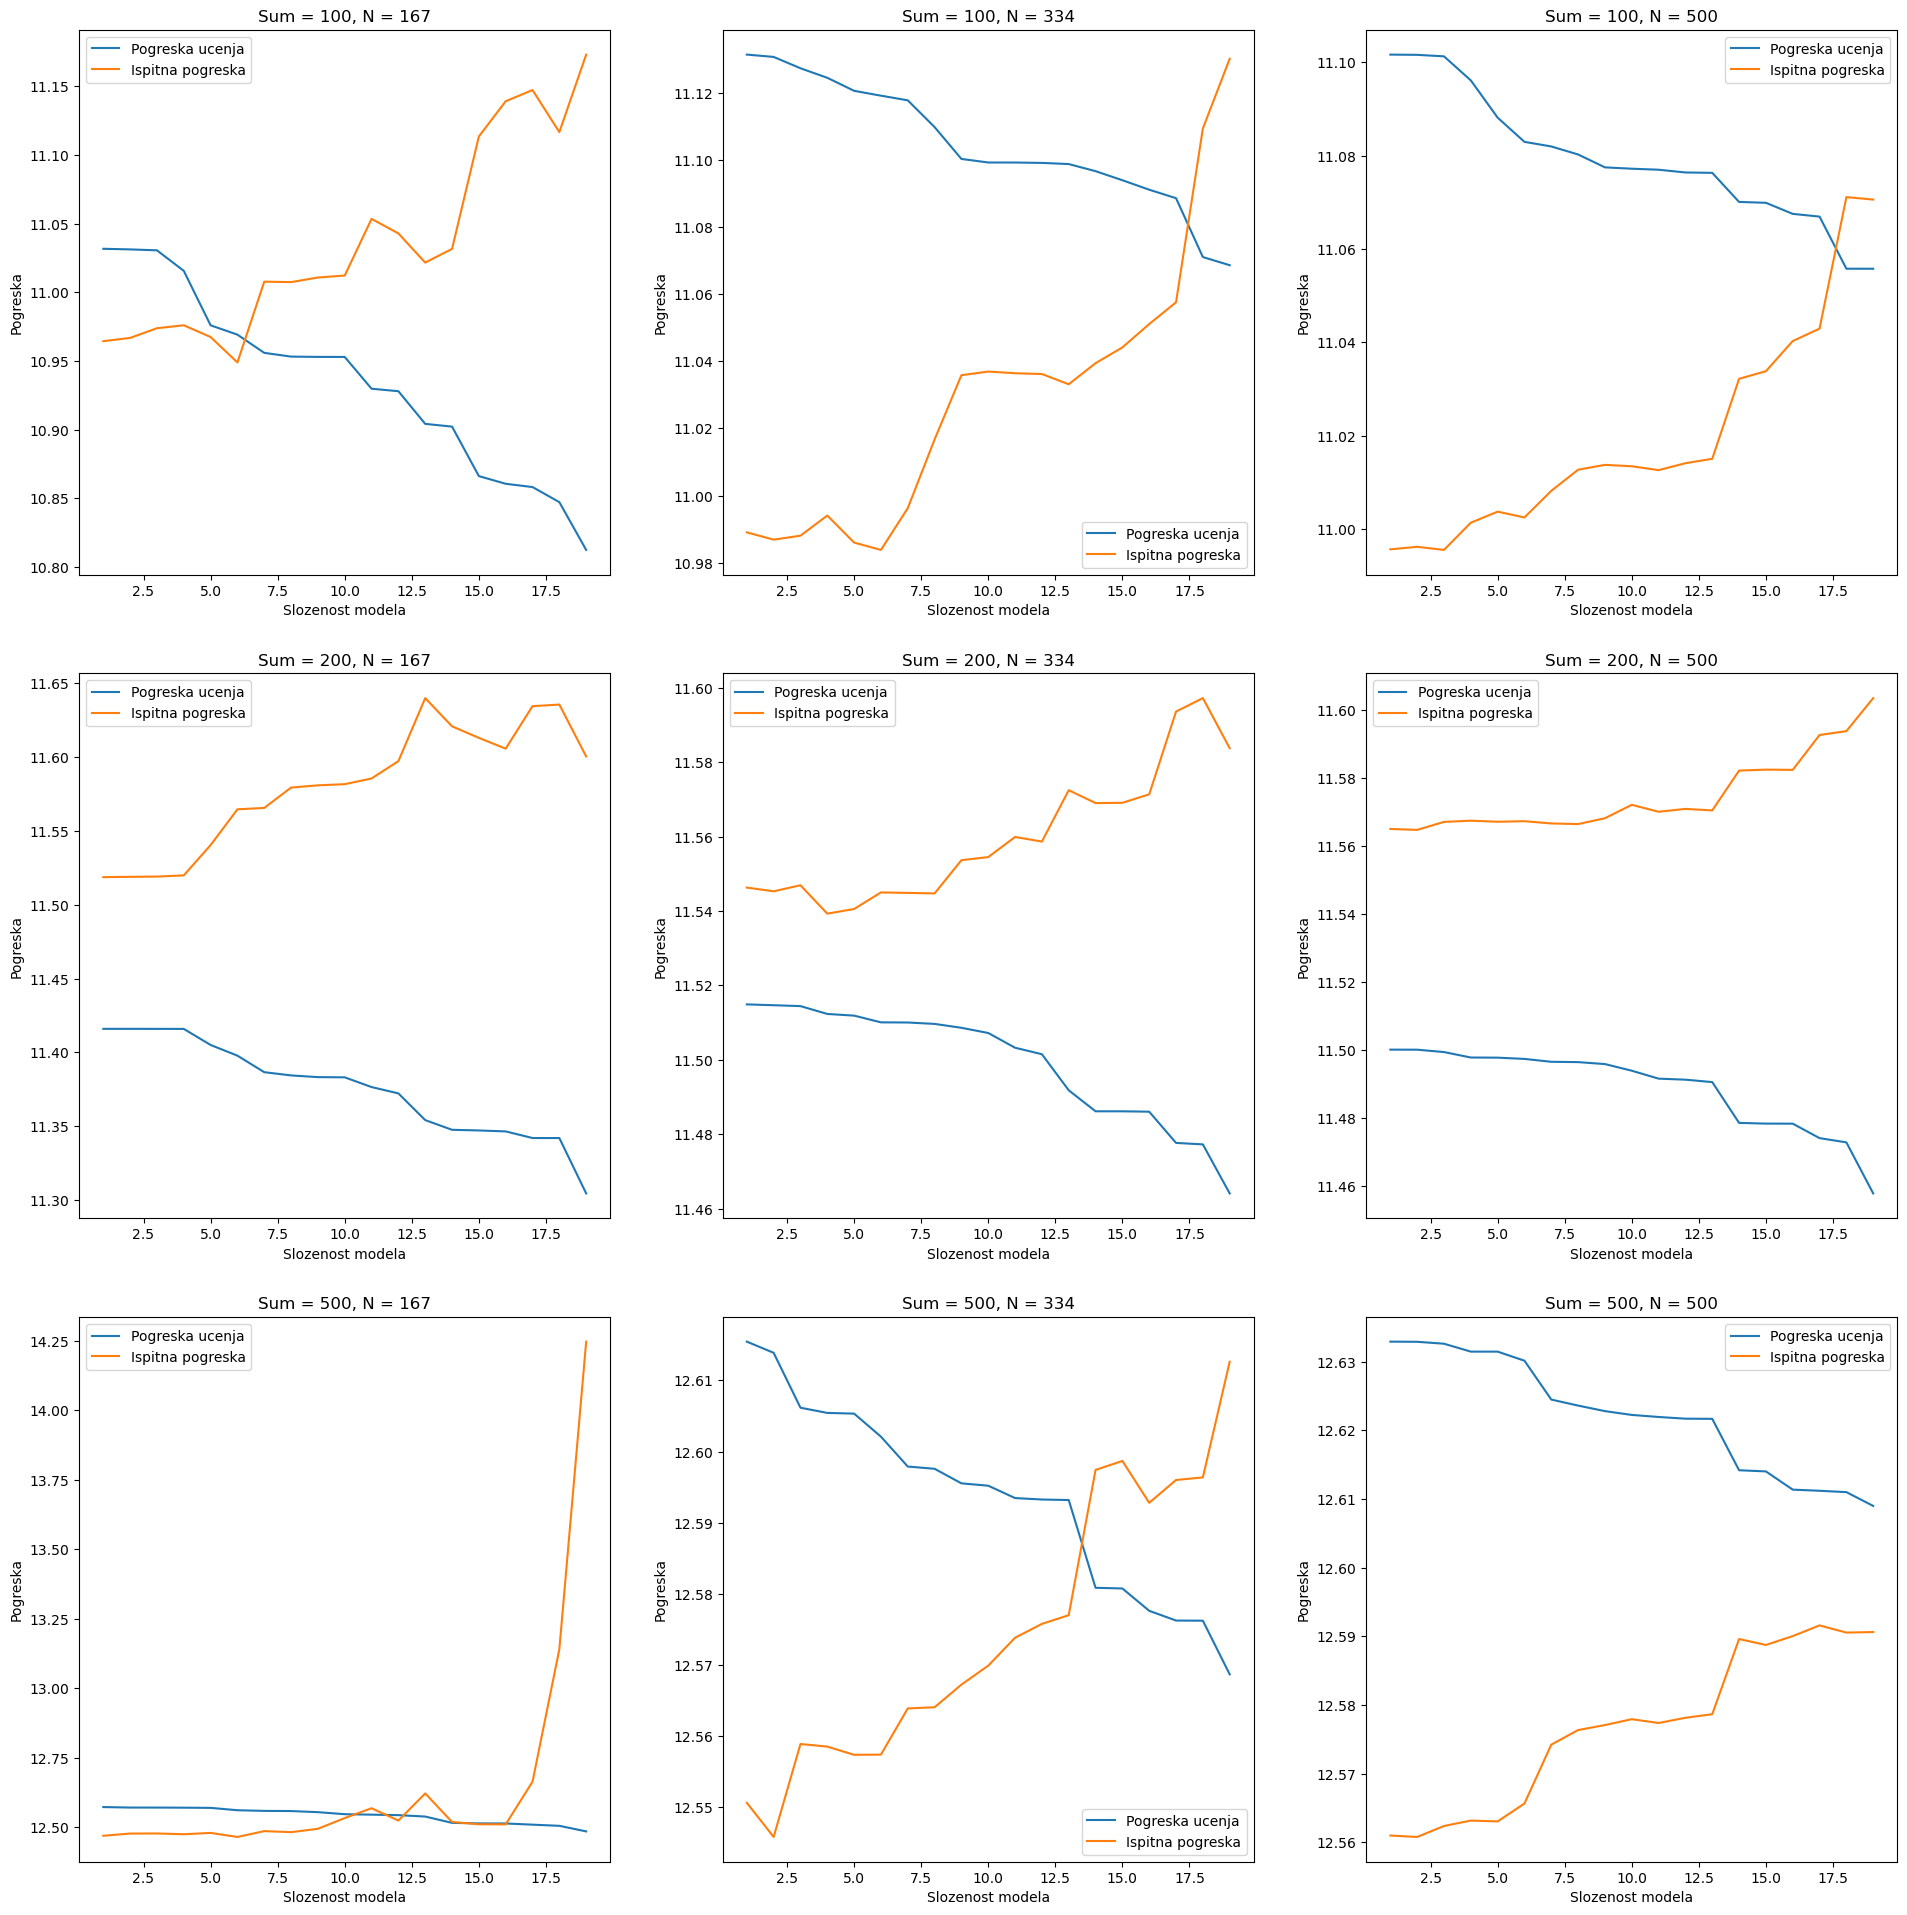

In [44]:
izracunaj_i_graf_tocnosti(1000,sumovi = [100, 200, 500]);

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [45]:
def print_tezine(w):
    string_builder = ""
    for index, t in enumerate(w):
        string_builder = string_builder + f"w{index} = {t}"
        if index != len(w) - 1:
            string_builder += ","

    return string_builder

In [46]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

poly = PolynomialFeatures(degree=3)

matrica_dizajna = poly.fit_transform(X)
matrica_dizajna_transponirano = np.matrix.transpose(matrica_dizajna)

regularizacijski_izrazi = [0, 1, 10, 20, 100]
y_predictions = []
w_by_hands = []
for tezina in regularizacijski_izrazi:
    I = tezina * np.identity(matrica_dizajna.shape[1])
    I[0][0] = 0

    w = (matrica_dizajna_transponirano @ matrica_dizajna + I)
    w = linalg.inv(w)
    w = w @ matrica_dizajna_transponirano @ y
    w_by_hands.append(w)
    print(f"Tezine ,za lambda = {tezina}, {print_tezine(w)}")
    

Tezine ,za lambda = 0, w0 = 3.9999999999986056,w1 = -5.916666666666434,w2 = 3.374999999999991,w3 = -0.4583333333333446
Tezine ,za lambda = 1, w0 = 3.0569614512471652,w1 = -0.6907936507936491,w2 = -0.28317460317459786,w3 = 0.14458049886621163
Tezine ,za lambda = 10, w0 = 2.494441843122963,w1 = -0.15897294873413773,w2 = -0.13423066536848383,w3 = 0.08156009919705863
Tezine ,za lambda = 20, w0 = 2.38552446423869,w1 = -0.08786230601745826,w2 = -0.07439784364745186,w3 = 0.06349716440772506
Tezine ,za lambda = 100, w0 = 2.290557214963172,w1 = -0.017955827156302385,w2 = -0.01015836007309117,w3 = 0.04351763687364857


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [47]:
from sklearn.linear_model import Ridge

X = np.array([[0], [1], [2], [4]])

matrica_dizajna = PolynomialFeatures(include_bias=False, degree=3).fit_transform(X)
y = np.array([4, 1, 2, 5])
w_by_model = []
for tezina in regularizacijski_izrazi:
    clf = Ridge(tezina)
    clf.fit(matrica_dizajna, y)
    
    w = np.hstack((clf.intercept_, clf.coef_))
    w_by_model.append(w)
    print(f"Tezine ,za lambda = {tezina}, {print_tezine(w)}")

for index in range(len(w_by_hands)):
    is_close = np.isclose(w_by_hands[index], w_by_model[index]).flatten()
    if all(is_close):
        print(f"Za iteraciju {index + 1}. tezine su iste")
    else:
        print(f"Za iteraciju {index + 1}. tezine nisu iste")



Tezine ,za lambda = 0, w0 = 3.9999999999999574,w1 = -5.916666666666359,w2 = 3.3749999999997704,w3 = -0.4583333333332945
Tezine ,za lambda = 1, w0 = 3.0569614512471652,w1 = -0.6907936507936514,w2 = -0.283174603174602,w3 = 0.1445804988662129
Tezine ,za lambda = 10, w0 = 2.494441843122973,w1 = -0.1589729487341473,w2 = -0.13423066536848285,w3 = 0.08156009919705863
Tezine ,za lambda = 20, w0 = 2.385524464238694,w1 = -0.0878623060174581,w2 = -0.07439784364745221,w3 = 0.06349716440772504
Tezine ,za lambda = 100, w0 = 2.2905572149631728,w1 = -0.017955827156302454,w2 = -0.010158360073091356,w3 = 0.04351763687364856
Za iteraciju 1. tezine su iste
Za iteraciju 2. tezine su iste
Za iteraciju 3. tezine su iste
Za iteraciju 4. tezine su iste
Za iteraciju 5. tezine su iste


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [48]:
def generiraj(regularizacijski_izrazi = [0, 100], d = [2, 10]):
    X = make_instances(-5, 5, 50)
    y = make_labels(X,f,200)
    
    for dimension in d:
        poly = PolynomialFeatures(degree=dimension, include_bias=False)
        matrica_dizajna = poly.fit_transform(X)
        
        for lamda_ in regularizacijski_izrazi:
            clf = Ridge(alpha=lamda_)
            clf = clf.fit(matrica_dizajna, y)
            
            y_pred = clf.predict(matrica_dizajna)
            plt.plot(X, y_pred, label=f"lambda = {lamda_}, d = {dimension}")
    
    plt.scatter(X,y)
    plt.legend(loc = "best")
    plt.show()

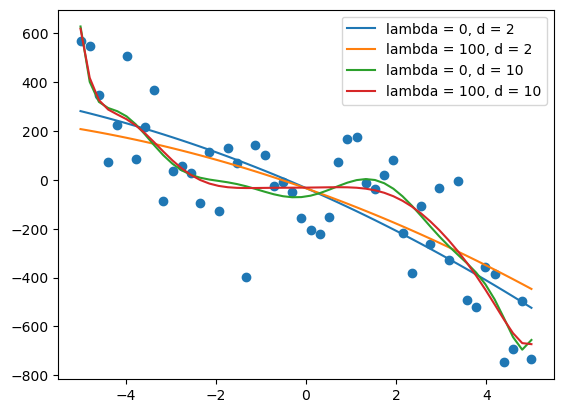

In [49]:
generiraj()

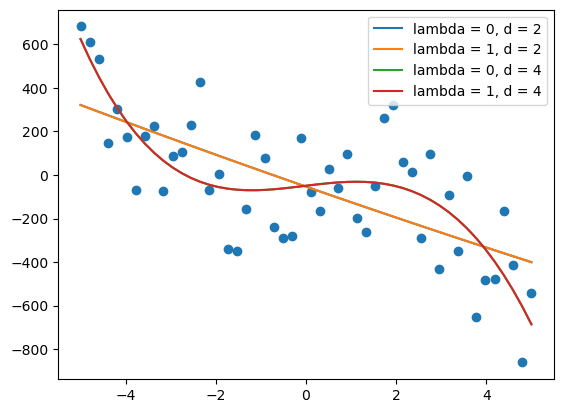

In [50]:
generiraj(regularizacijski_izrazi=[0,1], d=[2,4])

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


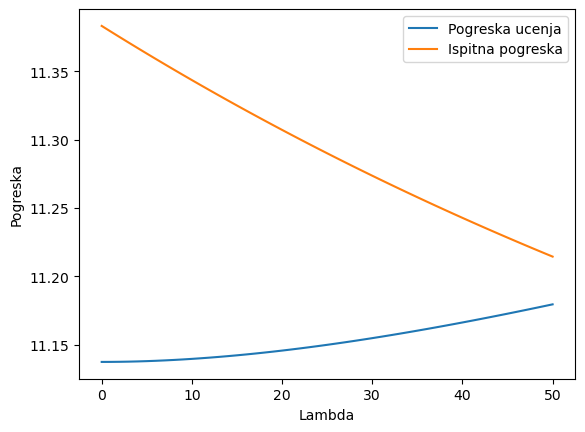

In [84]:
from math import log

d = 10
X = make_instances(-5,5,50)
y = make_labels(X,f,noise = 200)

poly = PolynomialFeatures(degree=d, include_bias=False) 
matrica_dizajna = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, test_size=0.5)

pogreske_ucenja = []
ispitne_pogreske = []

for lamda_ in range(51):
    clf = Ridge(alpha=lamda_)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    pogreska_ucenja = mean_squared_error(y_train,y_pred_train)
    ispitna_pogreska = mean_squared_error(y_test, y_pred_test)
    
    pogreske_ucenja.append(np.log(pogreska_ucenja))
    ispitne_pogreske.append(np.log(ispitna_pogreska))
    
plt.plot(range(51), pogreske_ucenja, label = "Pogreska ucenja")
plt.plot(range(51), ispitne_pogreske, label = "Ispitna pogreska")
plt.legend(loc = "best")
plt.xlabel("Lambda")
plt.ylabel("Pogreska")
plt.show()
    


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [52]:
def nonzeroes(coef, tol=1e-6):
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

[-34.07488721 -17.20632653   2.26240172   0.89310747  -0.25578565]
[-31.40309377 -17.04449856   1.8779783    0.88855816  -0.24391621]
[-29.12326641 -16.88685006   1.54979178   0.88385849  -0.23378938]
[-27.15505998 -16.73300191   1.26632243   0.87905919  -0.22504809]
[-25.43868316 -16.5826565    1.01899726   0.8741974   -0.21742664]
[-23.92872099 -16.43557383   0.80130433   0.86930073  -0.21072319]
[-22.59005905 -16.29155575   0.6082085    0.86439     -0.20478169]
[-21.39511984 -16.15043524   0.43575515   0.8594811   -0.19947957]
[-20.32194363 -16.01206894   0.28079508   0.85458625  -0.19471923]
[-19.35282733 -15.87633181   0.14078938   0.84971488  -0.19042199]
[-1.84733408e+01 -1.57431133e+01  1.36683836e-02  8.44874357e-01
 -1.86523705e-01]
[-17.67160373 -15.61231436  -0.10227198   0.84007038  -0.18297157]
[-16.93774663 -15.48384558  -0.20844749   0.83530739  -0.1797217 ]
[-16.26350233 -15.35762524  -0.30604419   0.83058884  -0.17673735]
[-15.64189368 -15.23357822  -0.39606314   0.82

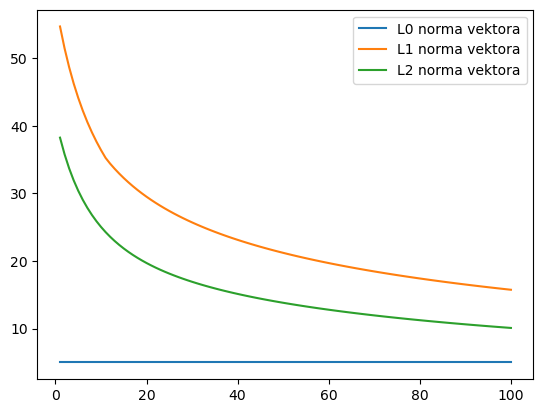

In [53]:
from sklearn.linear_model import Ridge
X = make_instances(-5,5,50)
y = make_labels(X,f,noise)

d = 5
matrica_dizajna = PolynomialFeatures(degree=d, include_bias=False).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(matrica_dizajna,y, train_size=0.5, test_size=0.5)

L0 = []
L1 = []
L2 = []
min = 1
max = 101
range_ = range(min,max)
for lamda_ in range_:
    clf = Ridge(alpha=lamda_)
    clf.fit(X_train, y_train)
    
    w = clf.coef_.flatten()
    print(w)
    L0.append(nonzeroes(w))
    L1.append(np.linalg.norm(w,ord=1))
    L2.append(np.linalg.norm(w, ord=2))
    
plt.plot(range_, L0, label = "L0 norma vektora")
plt.plot(range_, L1, label = "L1 norma vektora")
plt.plot(range_, L2, label = "L2 norma vektora")

plt.legend()
plt.show()
    

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

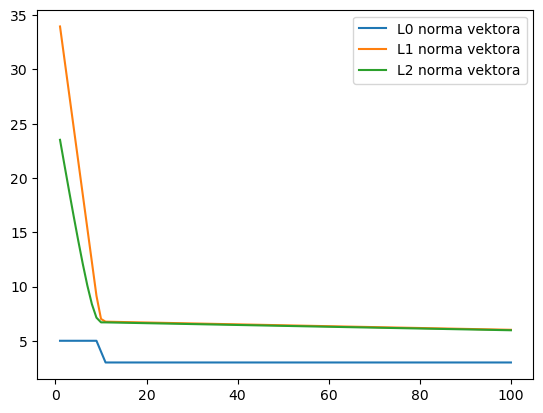

In [54]:
from sklearn.linear_model import Lasso
X = make_instances(-5,5,50)
y = make_labels(X,f,noise)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.5, test_size=0.5)

d = 5
matrica_dizajna = PolynomialFeatures(degree=d, include_bias=False).fit_transform(X_train)

L0 = []
L1 = []
L2 = []
min = 1
max = 101
range_ = range(min,max)
for lamda_ in range_:
    lasso = Lasso(alpha=lamda_)
    lasso.fit(matrica_dizajna, y_train)
    
    w = lasso.coef_.flatten()
    L0.append(nonzeroes(w))
    L1.append(np.linalg.norm(w,ord=1))
    L2.append(np.linalg.norm(w, ord=2))
    
plt.plot(range_, L0, label = "L0 norma vektora")
plt.plot(range_, L1, label = "L1 norma vektora")
plt.plot(range_, L2, label = "L2 norma vektora")

plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [55]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale=500.0, size=n_data_points)
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale=2.0, size=n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score, grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale=0.5, size=n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

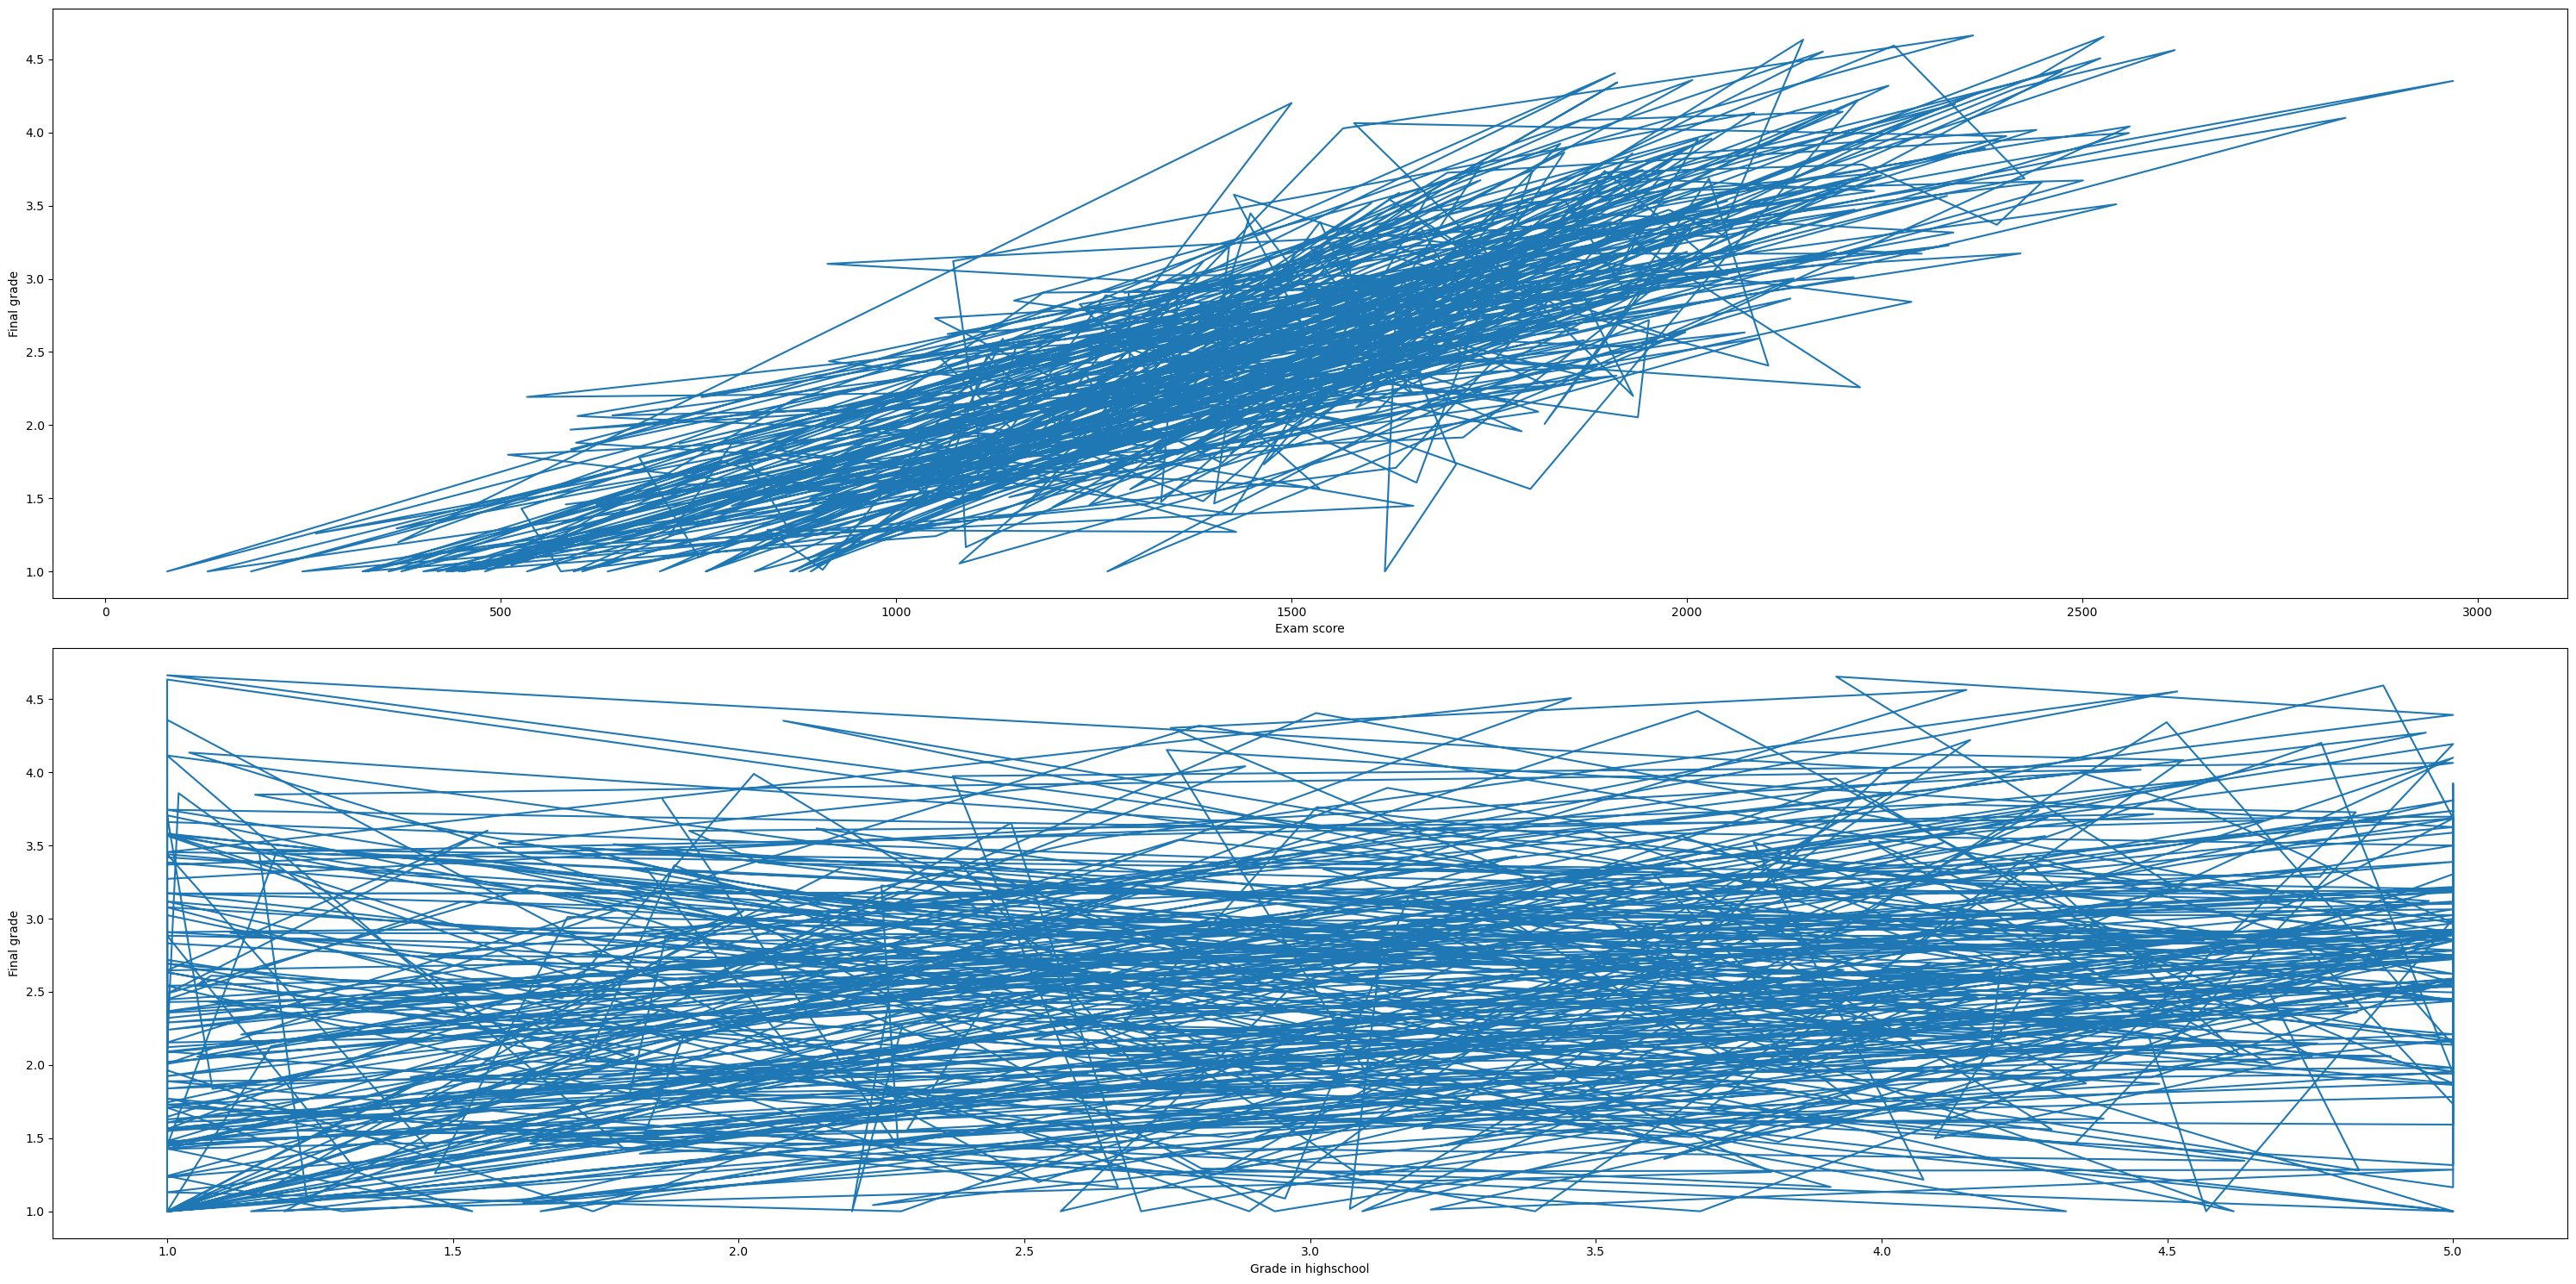

In [56]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
plt.plot(exam_score,grades_y)
plt.xlabel("Exam score")
plt.ylabel("Final grade")

plt.subplot(2,1,2)
plt.plot(grade_in_highschool, grades_y)
plt.xlabel("Grade in highschool")
plt.ylabel("Final grade")

plt.tight_layout()
plt.show()


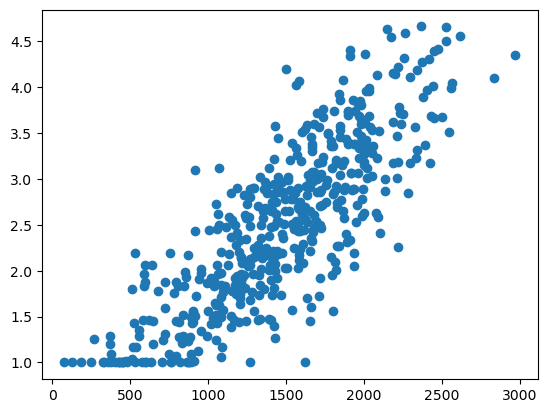

In [57]:
plt.scatter(exam_score,grades_y)

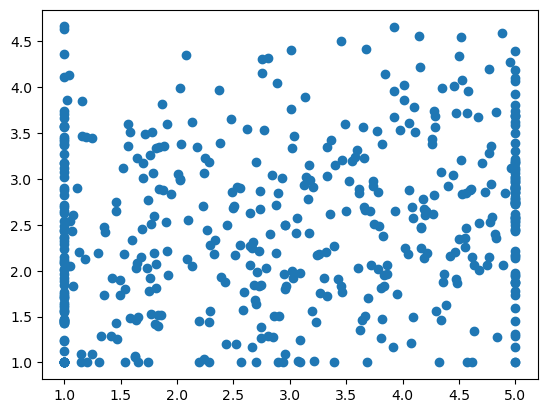

In [58]:
plt.scatter(grade_in_highschool,grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [59]:
clf = Ridge(alpha=0.01)
clf.fit(grades_X, grades_y)

print(clf.intercept_)
print(clf.coef_)

0.15061179575775974
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [60]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed, grades_y_fixed)

print(clf.intercept_)
print(clf.coef_)

[8.62551331e-17]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [61]:
grades_X_fixed_colinear = np.insert(grades_X_fixed, 1,  grades_X_fixed[:, 1],axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [62]:
clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)

print(clf.intercept_)
print(clf.coef_)

[8.6255971e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)


Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [96]:
def calculate_and_print_std(w, lambda_):
    std = []
    for index in range(len(w[0])):
        std.append(np.std([w_item[index] for w_item in w]))
        
    print(f"Standardna devijacija za lambda = {lambda_} iznosi: {std}")

In [97]:
velicina = int(0.5 * len(grades_X_fixed_colinear))
svi_indeksi = np.arange(len(grades_X_fixed_colinear))
lamda_0_01 = 0.01
lamda_1000 = 1000

w_0_01 = []
w_1000 = []
for i in range(10):
    indeksi = np.random.choice(len(grades_X_fixed_colinear), size=velicina, replace=False)
    ostali_indeksi = np.setdiff1d(svi_indeksi,indeksi)

    podatci_0_001 = grades_X_fixed_colinear[indeksi]
    y_0_001 = grades_y_fixed[indeksi]
    podatci_1000 = grades_X_fixed_colinear[ostali_indeksi]
    y_1000 = grades_y_fixed[ostali_indeksi]
    
    clf = Ridge(alpha=lamda_0_01)
    clf.fit(podatci_0_001, y_0_001)
    
    w = np.hstack((clf.intercept_, clf.coef_.flatten()))
    w = w.flatten()
    w_0_01.append(w[1:])
    print(f"Prolaz {i + 1}.: w:{w}, lambda: {lamda_0_01}")
    
    clf = Ridge(alpha=lamda_1000)
    clf.fit(podatci_1000, y_1000)
    w = np.hstack((clf.intercept_, clf.coef_.flatten()))
    w = w.flatten()
    
    w_1000.append(w[1:])
    print(f"Prolaz {i + 1}.: w:{w}, lambda: {lamda_1000}")
    
# scaler = StandardScaler()
# scaler.fit(w_0_01)
# print(f"Standardna devijacija za lambda = {lamda_0_01} iznosi: {scaler.var_}")
# scaler.fit(w_1000)
# print(f"Standardna devijacija za lambda = {lamda_1000} iznosi: {scaler.var_}")
# print(w_0_01[:][:1])
calculate_and_print_std(w_0_01,lamda_0_01)
calculate_and_print_std(w_1000, lamda_1000)


Prolaz 1.: w:[-0.01535514  0.80935765  0.07088499  0.07088499], lambda: 0.01
Prolaz 1.: w:[0.02689086 0.16625527 0.03365384 0.03365384], lambda: 1000
Prolaz 2.: w:[-0.00886043  0.79614247  0.09347896  0.09347896], lambda: 0.01
Prolaz 2.: w:[0.02595291 0.16103098 0.0214737  0.0214737 ], lambda: 1000
Prolaz 3.: w:[-0.01537189  0.78648995  0.07128393  0.07128393], lambda: 0.01
Prolaz 3.: w:[0.01899727 0.15802284 0.02306907 0.02306907], lambda: 1000
Prolaz 4.: w:[0.01233144 0.81610815 0.08855808 0.08855808], lambda: 0.01
Prolaz 4.: w:[-0.03130104  0.16266728  0.02666261  0.02666261], lambda: 1000
Prolaz 5.: w:[0.00923904 0.80718321 0.08849392 0.08849392], lambda: 0.01
Prolaz 5.: w:[0.00303909 0.1627045  0.02606055 0.02606055], lambda: 1000
Prolaz 6.: w:[0.02624712 0.82315119 0.06768041 0.06768041], lambda: 0.01
Prolaz 6.: w:[-0.05987171  0.15235384  0.03495845  0.03495845], lambda: 1000
Prolaz 7.: w:[0.01681745 0.82801361 0.07629092 0.07629092], lambda: 0.01
Prolaz 7.: w:[0.0086772  0.1665

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.